In [1]:
import pandas as pd

In [17]:
vae = pd.read_csv('results_vae_real.csv')
random = pd.read_csv('results_random_real.csv')

# 2 questions were not sampled by Qualtrics in random set of questions
vae = vae.loc[~(vae==0).all(axis=1)]
random = random.loc[~(random==0).all(axis=1)]

## Accuracies
Below the accuracy of correctly choosing a real sound over either a random or a variational auto-encoder sound.


In [79]:
accuracy_real_vs_vae = vae['real'].sum()/(vae['real'].sum()+vae['vae'].sum())
accuracy_real_vs_random = random['real'].sum()/(random['real'].sum()
                                                +random['random'].sum())

print('Accuracy real over VAE: ', accuracy_real_vs_vae)
print('Accuracy real over random: ', accuracy_real_vs_random)

Accuracy real over VAE:  0.5287356321839081
Accuracy real over random:  0.7065868263473054


## Standard deviation

In [84]:
vae['accuracy_per_question'] = vae['real']/(vae['real']+vae['vae'])
random['accuracy_per_question'] = random['real']/(random['real']+random['random'])

In [91]:
vae_std = vae['accuracy_per_question'].std()
random_std = random['accuracy_per_question'].std()

print('Standard deviation of accuracies per question in vae vs real: ', vae_std)
print('Standard deviation of accuracies per question in random vs real: ', random_std)

Standard deviation of accuracies per question in vae vs real:  0.32493772597888465
Standard deviation of accuracies per question in random vs real:  0.21828280919866125


## Boxplot

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


<ErrorbarContainer object of 3 artists>

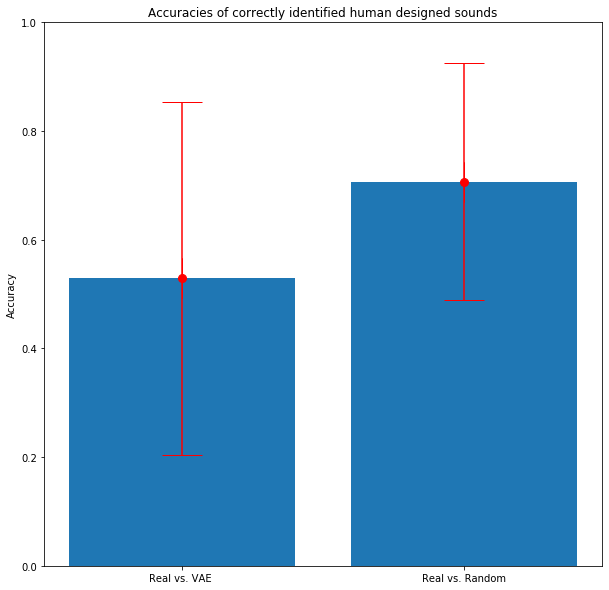

In [125]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

x = ['Real vs. VAE ','Real vs. Random']
y = [accuracy_real_vs_vae,accuracy_real_vs_random]
rcParams["errorbar.capsize"] = 0.5
ax.bar(np.arange(len(x)),y)
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x,rotation= 0, zorder = 100)
ax.set_ylabel('Accuracy')
ax.set_ylim(0,1)
ax.set_title('Accuracies of correctly identified human designed sounds')
ax.errorbar([0,1], y, xerr = [0,0], yerr = [vae_std,random_std], fmt='ro',markersize=8, capsize=20)